In [1]:
from webbrowser import get
import torchtt as tntt
import numpy as np
import tt_iga
import matplotlib.pyplot as plt
import torch as tn
import datetime

tn.set_default_dtype(tn.float64)


In [2]:
def create_geometry( ):
    
    Nt = 24                                                                
    lz = 40e-3                                                             
    Do = 72e-3                                                            
    Di = 51e-3                                                            
    hi = 13e-3                                                             
    bli = 3e-3                                                             
    Dc = 3.27640e-2                                                           
    hc = 7.55176e-3                                                           
    ri = 20e-3                                                           
    ra = 18e-3                                                           
    blc = hi-hc                                                           
    rm = (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)                 
    R = rm-ri

    get_rO = lambda Ax,Ay,ri: (Ax**2+Ay**2-ri**2)/(np.sqrt(2)*(Ax+Ay)-2*ri)

    O = np.array([rm/np.sqrt(2),rm/np.sqrt(2)])
    alpha1 = -np.pi*3/4       
    alpha2 = np.math.asin((hc-rm/np.sqrt(2))/R)
    alpha = np.abs(alpha2-alpha1)
    
    A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
    b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
    C = np.linalg.solve(A,b)

    def Cx(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),( (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)  )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[0]

    def Cy(ri,Dc,hc):
        O = [((Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri) )/np.sqrt(2),( (Dc*Dc+hc*hc-ri*ri)/(Dc*np.sqrt(2)+hc*np.sqrt(2)-2*ri)  )/np.sqrt(2)]
        A = np.array([[O[0] - ri/np.sqrt(2), O[1] - ri/np.sqrt(2)], [O[0] - Dc, O[1] - hc]])
        b = np.array([[A[0,0]*ri/np.sqrt(2)+A[0,1]*ri/np.sqrt(2)],[A[1,0]*Dc+A[1,1]*hc]])
        C = np.linalg.solve(A,b)
        return C[1]

    control_points = tt_iga.geometry.ParameterDependentControlPoints([7,5])

    # params ri - 0 , Dc - 1 , Di - 2 
    control_points[:,0,0] = [0,0]
    control_points[:,1,0] = [lambda params: (Dc+params[1])/2, 0]
    control_points[:,2,0] = [lambda params: (Dc+params[1]), 0]
    control_points[:,3,0] = [(Dc+Di)/2,0]
    control_points[:,4,0] = [lambda params: Di+params[2],0]
    control_points[:,5,0] = [(Do+Di)/2,0]
    control_points[:,6,0] = [Do,0]
    
    control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    control_points[:,1,1] = [lambda params: (Cx(ri,Dc,hc)+Dc/2)*0.5, lambda params: Cy(ri,Dc,hc)*0.5]
    control_points[:,2,1] = [lambda params: (Dc+params[1]), hc*0.5]
    control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    control_points[:,6,1] = [Do,(hi-bli)*0.5]

    #control_points[:,0,1] = [lambda params: (ri+params[0])/np.sqrt(2)*0.5,lambda params: (ri+params[0])/np.sqrt(2)*0.5]
    #control_points[:,1,1] = [lambda params: (Cx(ri+params[0],Dc+params[1],hc)+(Dc+params[1])/2)*0.5, lambda params: Cy(ri+params[0],Dc+params[1],hc)*0.5]
    #control_points[:,2,1] = [lambda params: (Dc+params[1]), hc*0.5]
    #control_points[:,3,1] = [(Dc+Di)/2,0.5*(hi-bli+hc)*0.5]
    #control_points[:,4,1] = [lambda params: Di+params[2],(hi-bli)*0.5]
    #control_points[:,5,1] = [(Do+Di)/2,(hi-bli)*0.5]
    #control_points[:,6,1] = [Do,(hi-bli)*0.5]
    
    control_points[:,0,2] = [lambda params: (ri+params[0])/np.sqrt(2),lambda params: (ri+params[0])/np.sqrt(2)]
    control_points[:,1,2] = [lambda params: Cx(ri+params[0],Dc+params[1],hc), lambda params: Cy(ri+params[0],Dc+params[1],hc)]
    control_points[:,2,2] = [lambda params: (Dc+params[1]), hc]
    control_points[:,3,2] = [(Dc+Di)/2,0.5*(hi-bli+hc)]
    control_points[:,4,2] = [lambda params: Di+params[2],hi-bli]
    control_points[:,5,2] = [(Do+Di)/2,hi-bli]
    control_points[:,6,2] = [Do,hi-bli]
    
    control_points[:,0,3] = [(0.75*ri+0.25*Do)/np.sqrt(2),(0.75*ri+0.25*Do)/np.sqrt(2)]
    control_points[:,1,3] = [0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+Dc+blc), 0.5*((0.75*ri+0.25*Do)/np.sqrt(2)+hi)]
    control_points[:,2,3] = [Dc+blc, hi]
    control_points[:,3,3] = [0.5*(Dc+blc+Di-bli),hi]
    control_points[:,4,3] = [Di-bli,hi]
    control_points[:,5,3] = [lambda params: 0.5*(Di+params[2]-bli+Do),hi]
    control_points[:,6,3] = [Do,hi]

    control_points[:,0,4] = [Do/np.sqrt(2), Do/np.sqrt(2)]
    control_points[:,1,4] = [Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*(0.5*Dc/Do), Do/np.sqrt(2)*(1-0.5*Dc/Do)+Do*np.tan(np.pi/8)*(0.5*Dc/Do)]
    control_points[:,2,4] = [Do/np.sqrt(2)*(1-Dc/Do)+Do*(Dc/Do), Do/np.sqrt(2)*(1-Dc/Do)+Do*np.tan(np.pi/8)*(Dc/Do)]
    control_points[:,3,4] = [Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*(0.5*(Dc+Di)/Do), Do/np.sqrt(2)*(1-0.5*(Dc+Di)/Do)+Do*np.tan(np.pi/8)*(0.5*(Dc+Di)/Do)]
    control_points[:,4,4] = [Do/np.sqrt(2)*(1-Di/Do)+Do*(Di/Do), Do/np.sqrt(2)*(1-Di/Do)+Do*np.tan(np.pi/8)*(Di/Do)]
    control_points[:,5,4] = [Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*(0.5*(Di+Do)/Do), Do/np.sqrt(2)*(1-0.5*(Di+Do)/Do)+Do*np.tan(np.pi/8)*(0.5*(Di+Do)/Do)]
    control_points[:,6,4] = [Do,Do*np.tan(np.pi/8)]

    weights = tt_iga.geometry.ParameterDependentWeights([7,5])
    weights[...] = 1.0
    alpha2 = lambda params: np.math.asin((hc-get_rO(Dc+params[1],hc,ri+params[0])/np.sqrt(2))/(get_rO(Dc+params[1],hc,ri+params[0])-ri-params[0]))
    weights[1,2] = lambda params :  np.abs(alpha2(params)+np.pi*3/4)
    # weights[1,2] = lambda params :  np.abs(alpha2+np.pi*3/4)
    return control_points, weights

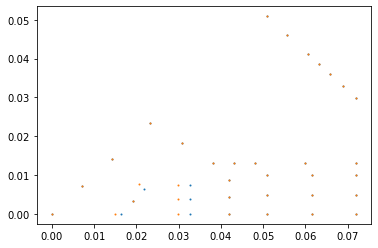

In [3]:
control_points, weights = create_geometry()
var = 0.001
pts = control_points([0,0,0])
plt.figure()
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)
pts = control_points([0,-0.003,0])
plt.scatter(pts[0,...].flatten(),pts[1,...].flatten(),s=1)


basis1 = tt_iga.bspline.BSplineBasis(np.array([0,0.4,0.4,0.6,0.6,1]),2)
basis2 = tt_iga.bspline.BSplineBasis(np.array([0,0.15,0.3,0.5,1]),1)
basis = [basis1, basis2]
basis_solution = [tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.4,21), np.linspace(0.4,0.6,21),np.linspace(0.6,1,21))),2)]
basis_solution.append(tt_iga.bspline.BSplineBasis(np.concatenate((np.linspace(0,0.15,16),np.linspace(0.15,0.3,15), np.linspace(0.3,0.5,15),np.linspace(0.5,1,17))),2))

nl = 8
basis_param = [tt_iga.lagrange.LagrangeLeg(nl,[-var,var]), tt_iga.lagrange.LagrangeLeg(nl,[-var,var]), tt_iga.lagrange.LagrangeLeg(nl,[-var,var])]
geom = tt_iga.PatchNURBS.interpolate_parameter_dependent(control_points, weights, basis, basis_param)

Text(0.015, 0.005, 'air')

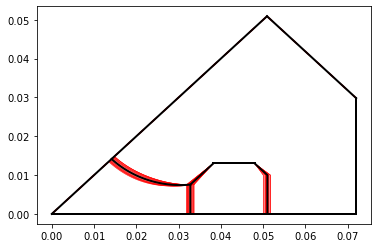

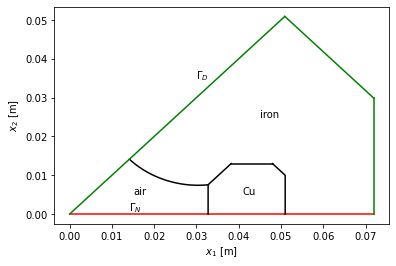

In [4]:
plt.figure()

for i in range(20):
    paramz = [tn.tensor([np.random.uniform()*2*var-var]),tn.tensor([np.random.uniform()*2*var-var]),tn.tensor([np.random.uniform()*2*var-var])]
    line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)

    line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)
    line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
    plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r', linewidth = 0.5)

paramz = [tn.tensor([0]),tn.tensor([0]),tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k', linewidth = 2)



plt.figure()
paramz = [tn.tensor([0]),tn.tensor([0]),tn.tensor([0])]
line = geom([tn.linspace(0,0.4,100),tn.tensor([0.3])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k')
line = geom([tn.linspace(0.4,0.6,100),tn.tensor([0.5])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k')
line = geom([tn.linspace(0,1,100),tn.tensor([1])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'g')
line = geom([tn.linspace(0,1,100),tn.tensor([0.0])]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'r')

line = geom([tn.tensor([0.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'g')
line = geom([tn.tensor([1.0]),tn.linspace(0,1,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'g')
line = geom([tn.tensor([0.4]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k')
line = geom([tn.tensor([0.6]),tn.linspace(0,0.5,100)]+paramz)
plt.plot(line[0].numpy().squeeze(), line[1].numpy().squeeze(), 'k')
plt.xlabel(r'$x_1$ [m]')
plt.ylabel(r'$x_2$ [m]')
plt.text(0.03,0.035,r'$\Gamma_D$')
plt.text(0.014,0.0008,r'$\Gamma_N$')
plt.text(0.045,0.025,r'iron')
plt.text(0.041,0.005,r'Cu')
plt.text(0.015,0.005,r'air')
# import tikzplotlib
# plt.savefig('quad_section.eps')
# tikzplotlib.save('quad_section.tex')

In [5]:

mu0 = 4*np.pi*1e-7
mur = 1000
mu_ref = lambda y: 1/mu0*((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))+1/(mu0*mur)*tn.logical_not((y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+(y[...,1]<0.3)*(y[...,0]<0.4))


Mass_tt = geom.mass_interp(basis_solution, eps = 1e-10)
Stiff_tt = geom.stiffness_interp(basis_solution, eps = 1e-8, func_reference=mu_ref, qtt = True, verb = True)

Jref = lambda y: 5000000*(y[...,1]<0.5)*(y[...,0]<0.6)*(y[...,0]>0.4)+0.0

rhs_tt = geom.rhs_interp(basis_solution,Jref)

P1 = tn.eye(Mass_tt.N[0])
P2 = tn.eye(Mass_tt.N[0])
P2[-1,-1] = 0
P1[0,0] = 0
P1[-1,-1] = 0
Pin_tt = tntt.rank1TT([P1,P2]) ** tntt.eye([nl]*3)
Pbd_tt = (tntt.eye(Mass_tt.N) - Pin_tt) ** tntt.eye([nl]*3)

M_tt = (Pin_tt@Stiff_tt+Pbd_tt).round(1e-10)
rhs_tt = (Pin_tt @ rhs_tt + 0).round(1e-10)

print('System matrix... ',flush=True)


print('Rank Mtt ',M_tt.R)
print('Rank rhstt ',rhs_tt.R)

tme = datetime.datetime.now() 
# dofs_tt = tntt.solvers.amen_solve(M_tt.cuda(), rhs_tt.cuda(), x0 = tntt.ones(rhs_tt.N).cuda(), eps = eps_solver, nswp = 50, kickrank = 4, preconditioner = 'c', verbose = False).cpu()
# dofs_tt = tntt.reshape(tntt.solvers.amen_solve(tntt.reshape(M_tt,[(2,2)]*21).round(1e-12).cuda(), tntt.reshape(rhs_tt,[2]*21).round(1e-12).cuda(), x0 = tntt.reshape(tntt.ones(rhs_tt.N),[2]*21).cuda(), eps = 1e-6, nswp = 50, kickrank = 32, preconditioner = 'c', verbose = True),rhs_tt.N).round(1e-12)
# dofs_tt = tntt.solvers.amen_solve(M_tt, rhs_tt, x0 = tntt.ones(rhs_tt.N), eps = 1e-6, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
dofs_tt = tntt.solvers.amen_solve(M_tt.cuda(), rhs_tt.cuda(), x0 = tntt.ones(rhs_tt.N).cuda(), eps = 1e-6, nswp = 50, kickrank = 8, preconditioner = 'c', verbose = True).cpu()
tme = datetime.datetime.now() - tme
print('Time system solve ',tme,flush=True)


time omega 0:00:01.854018
QTT enabled:
[240, 236, 8, 8, 8]
  || 
  \/  
[2, 2, 2, 2, 3, 5, 2, 2, 59, 2, 2, 2, 2, 2, 2, 2, 2, 2]
rank of Ftt is  [1, 3, 1, 1, 1, 1]
alpha, beta =  0 0
	time 1  0:00:00.509116
	time 2  0:00:03.067368  rank  [1, 4, 16, 56, 144, 384, 201, 415, 602, 69, 142, 128, 59, 32, 32, 6, 8, 4, 1]
		time  0:00:00.063852
	time 4  0:00:00.056924
alpha, beta =  0 1
	time 1  0:00:00.491260
	time 2  0:00:02.131128  rank  [1, 4, 16, 56, 144, 384, 153, 340, 539, 54, 110, 96, 42, 32, 32, 5, 8, 4, 1]
		time  0:00:00.057893
	time 4  0:00:00.062658
	time ROUND  0:00:00.362260
alpha, beta =  1 0
	time 1  0:00:00.489752
	time 2  0:00:02.150545  rank  [1, 4, 16, 56, 144, 384, 153, 340, 539, 54, 110, 96, 42, 32, 32, 5, 8, 4, 1]
		time  0:00:00.048935
	time 4  0:00:00.040417
alpha, beta =  1 1
	time 1  0:00:00.486109
	time 2  0:00:01.757012  rank  [1, 4, 16, 56, 144, 384, 141, 310, 525, 52, 104, 92, 42, 32, 32, 5, 8, 4, 1]
		time  0:00:00.040524
	time 4  0:00:00.061913
	time ROUND  0:0

In [ ]:
fspace = tt_iga.Function(basis_solution+basis_param)
fspace.dofs = dofs_tt

plt.figure()
y1, y2 = np.linspace(0,1,201), np.linspace(0.,1,201)
X1,X2 = geom([y1,y2]+[tn.tensor([0.0])]*3)
u = fspace([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*3)
plt.contourf(X1.numpy().squeeze(), X2.numpy().squeeze(),u.numpy().squeeze(),levels=32)
plt.colorbar()

import pickle
dct = {'x1' : X1.numpy().squeeze(), 'x2' : X2.numpy().squeeze(), 'u' : u.numpy().squeeze()}

    
u = fspace([tn.tensor([0.05]),tn.tensor([0.0]), tn.linspace(-0.001,0.001,100),tn.linspace(-0.001,0.001,100), tn.linspace(-0.001,0.001,100)])

def get_in_reference(x, param1):
    return 0.4*x/(3.27640e-2+param1)
    # return 0.1*x/(geom([tn.tensor([0.1]),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([param1]), tn.tensor([0.0])])[0].numpy().squeeze())


for p in np.linspace(-var,var,100):
    y1 = get_in_reference(0.01, p)
    xc =  geom([tn.tensor([y1]),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([p]), tn.tensor([0.0])])[0].numpy()
    print(xc.squeeze())

# kkt = [] 
# for p in np.linspace(-0.001,0.001,100):
#     xc =  geom([tn.tensor([0.2]),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([p]), tn.tensor([0.0])])[0].numpy()
#     print(xc.squeeze(), (3.27640e-2+p)/2)
#     kkt.append(xc.squeeze())



In [ ]:
y1, y2 = np.linspace(0,1,32), np.linspace(0.,1,32)

grad1, grad2 = geom.gradient_physical(basis_solution, fspace)

g2 = -grad1([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
g1 = grad2([tn.tensor(y1),tn.tensor(y2),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])
x1,x2 = geom([tn.tensor(y1),tn.tensor(y2)]+[tn.tensor([0.0])]*3)

plt.figure()
plt.quiver(x1.numpy().flatten(),x2.numpy().flatten(),g1.numpy().flatten(),g2.numpy().flatten(),np.sqrt(g1.numpy().flatten()**2+g2.numpy().flatten()**2))
plt.colorbar()

x1B, x2B = geom([get_in_reference(tn.linspace(0,0.002,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])])

dct['x1B'] = x1B.numpy().squeeze()
dct['x2B'] = x2B.numpy().squeeze()

g2 = -grad1([get_in_reference(tn.linspace(0,0.002,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])]).numpy().flatten()
g1 = grad2([get_in_reference(tn.linspace(0,0.002,8),0),tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0]), tn.tensor([0.0])]).numpy().flatten()

dct['B1'] = g1
dct['B2'] = g2

with open('quad_nominal.pkl','wb') as f:
    pickle.dump(dct, f)